### Pythonで始める機械学習(O'REILLY) 

    GitHub:https://github.com/amueller/introduction_to_ml_with_python

# 第二章 ： 教師あり学習

k-最近傍法・線形モデル・ナイーブベイズクラス分類器

### 2.1 クラス分類と回帰    


In [1]:
%matplotlib inline
from preamble import *

X.shape: (26, 2)


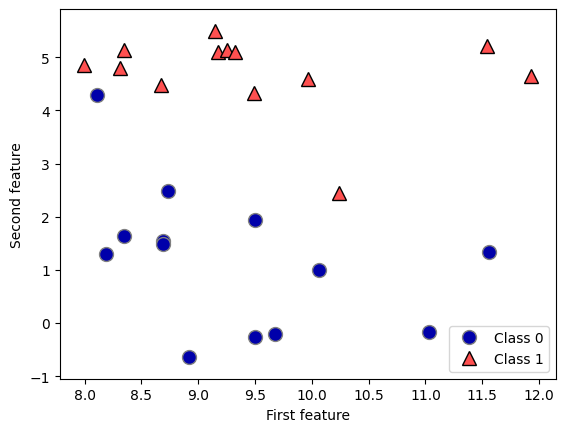

In [2]:
# データセットの生成(datasets.make_forge:サンプルデータセットを生成するための関数)
X, y = mglearn.datasets.make_forge()
# データセットをプロット(discrete_scatter:2次元散布図の作成関数)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4) #loc=4は右下を示す
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

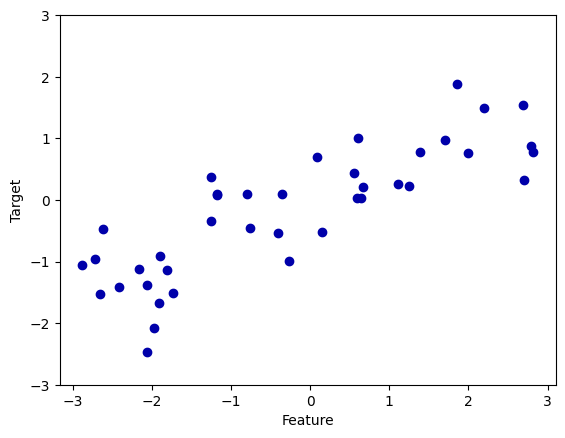

In [3]:
# _wave:1次元の波形データセットの生成。連続的なx軸（特徴量）とそれに対応するy軸（ターゲット）の値のペアからなる(サンプル数：40)
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
# y軸の表示範囲
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
#乳癌のデータセット(cancer)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# (569, 30)より、このデータセットは30の特徴量を持つ569のデータポイントで構成されるとわかる
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [6]:
# 569のデータポイントのうち、212が悪性で、357が良性。
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
print("Feature names:\n", cancer.DESCR)

Feature names:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fiel

In [8]:
# ボストンの住宅価格の中央値の予測のためのデータセット（13の特徴量を持つ、506のデータポイント）
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternati

In [38]:
print("Feature names:\n", boston.DESCR)

Feature names:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
     

In [9]:
#特徴量の積（交互作用）を含める
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-最近傍法

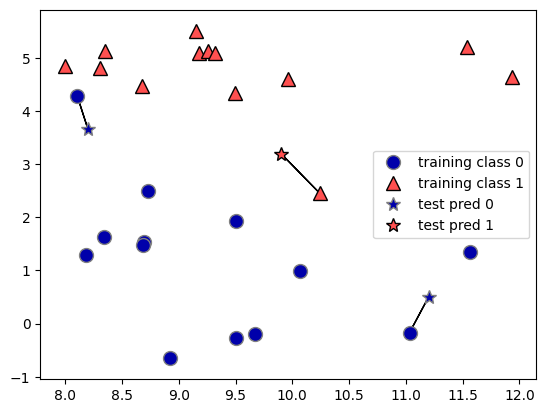

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

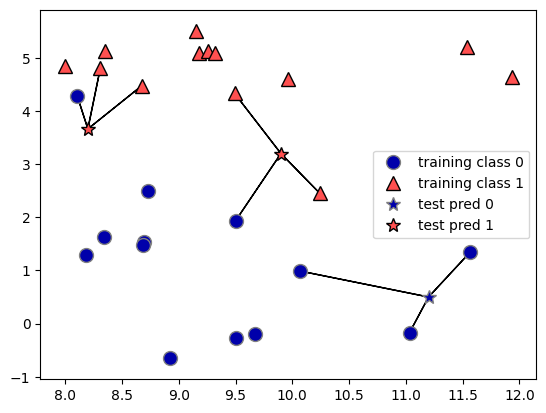

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
# データを訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
# クラスをインポートしてインスタンスを生成。(パラメータ：近傍点=3)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### 2.3.2.2 KNeighborsClassifierの解析

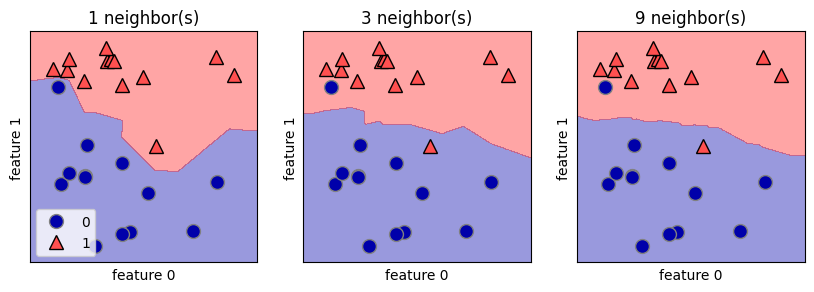

In [17]:
# k = 1, 3, 9の場合の決定境界を描画する
# 1行に3つのプロットを配置する図、figsize=(10, 3)：図の横幅を10、縦幅を3に設定
# fig:図、axes:軸
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので、1行で
    # インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # eps=0.5は境界の解像度, alpha=.4はプロットの透明度
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

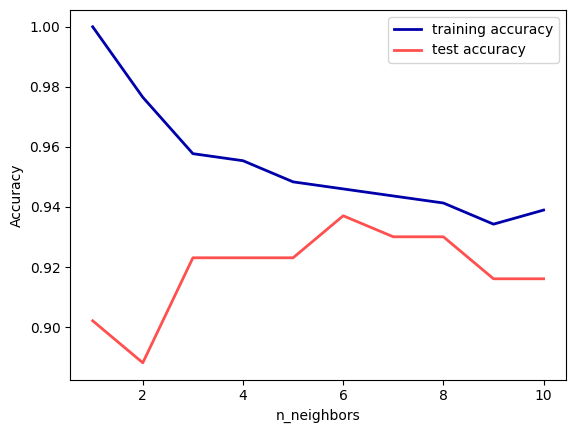

In [18]:
# cancer　訓練セットに対する性能とテストセットに対する性能を近傍点の数に対して評価する
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### 2.3.2.3 k-近傍回帰

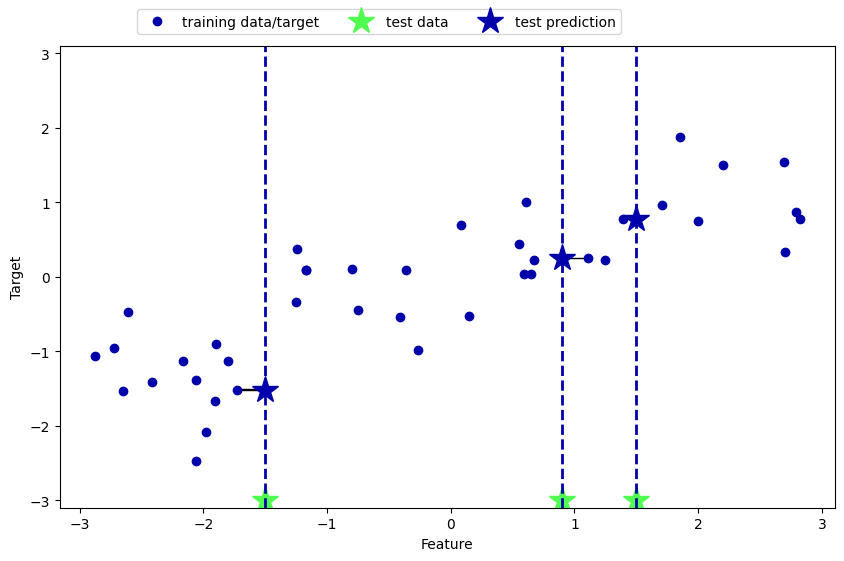

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

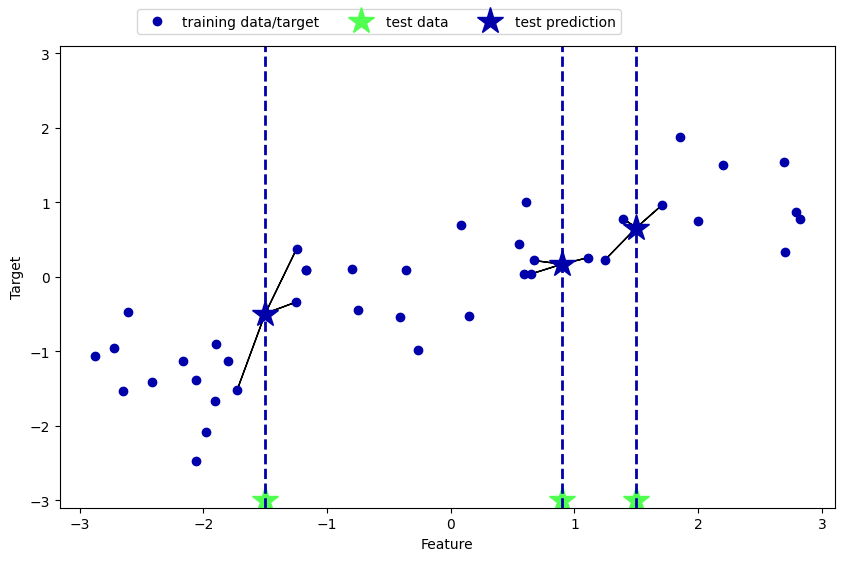

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
# テストセットに対する予測
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [23]:
# scoreメソッドを用いたモデルの評価
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### 2.3.2.4 KNeighborsRegressorの解析

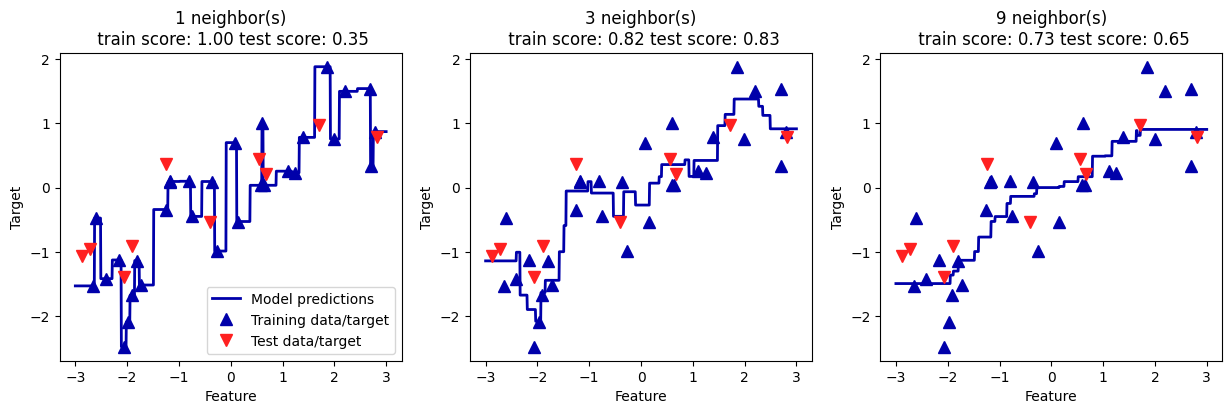

In [24]:
# 1次元データセットにおいて、全ての値に対する予測値
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3までの間に1,000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1,3,9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

最近傍法のモデル構築は非常に高速だが、訓練セットが大きくなると予測は遅くなる。
アルゴリズムは理解しやすい。処理速度は遅く、多数の特徴量を扱うことができないため、実際にはほとんど使われていない。

### 2.3.3 線形モデル

線形モデルは実用的に広く用いられている。
線形モデルは入力特徴量の線形関数（linear function）を用いて予測を行う。

回帰問題の線形モデルによる一般的な予測式：

### y = w[0] * x[0] + w[1] * x[1] + ・・・ + w[p] * x[p] + b

（x[0]からx[p]は特徴量、wとbは学習されたモデルのパラメータ、yはモデルからの予測）

特徴量が1つしかないデータセットの場合：

y = w[0] * x[0] + b → (y = a x + b 的な。w[0]が傾き、bがy切片を示す)

w[0]: 0.393906  b: -0.031804


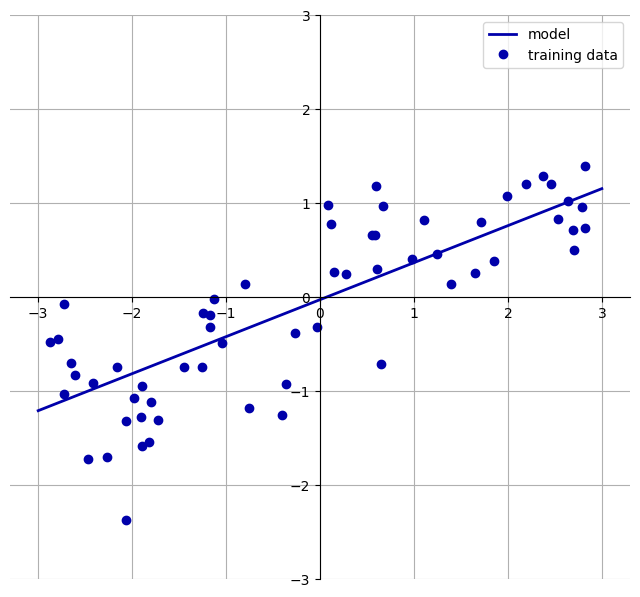

In [65]:
# linear_regression_wave：線形回帰を使用して波形データをプロットするの意味
mglearn.plots.plot_linear_regression_wave()

このモデルは、ターゲットyが特徴量の線形和で表すことができるという、強い仮定を置いている。

訓練データのデータポイント数よりも特徴量の数の方が多い場合には、どのようなyでも完全に訓練データセットの線形関数としてモデル化できる。

### 2.3.3.2 線形回帰（通常最小二乗法）

【線形回帰：最も単純で、最も古典的な線形回帰手法】

訓練データにおいて、予測と真の回帰ターゲットyとの平均二乗誤差（予測と真の値との差を二乗したものの平均値）が最小になるように、パラメータwとbを求める。線形回帰にはパラメータがないため、モデルの複雑さを制御する方法がない。

In [26]:
#図2-11に示したモデルを作成
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
# coef：係数・重み（「傾き」を表すパラメータ(w)）
# intercept：切片・オフセット
# 「_（アンダースコア）」を、訓練データから得られた属性の最後につける
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675976


In [28]:
# 訓練セット、テストセットに対する性能
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


    「過剰適合」とは、訓練データに対しては高い性能を示すが、未知のデータやテストデータに対しては性能が低下する現象を指す。

    「適合不足」とは、モデルが訓練データに対しても性能が低いままであり、訓練データのパターンをうまく捉えきれていない状態を指す。訓練データとテストデータの両方で性能が低下している状態。

In [ ]:
# bostonのデータセット(104の特徴量を持つ506のサンプル)
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
# 過剰適合気味　→　複雑度を制御できるモデルを探す必要あり(リッジ回帰)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### 2.3.3.3 リッジ回帰（L2正則化）

リッジ回帰：過剰適合を抑制する

係数(w)の絶対値の大きさを可能な限り0に近づけたい = 個々の特徴量が出力に与える影響（傾き）を小さくしたい

In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


LinearRegressionモデルよりも、Ridgeモデルの方が汎化性能（広い範囲に共通して適用できる）が高く、より適している。

alphaを増やすと係数はより0に近くなり、訓練セットに対する性能は低下するが汎化は向上する。

＝　Ridgeモデルでは、モデルの簡潔さ（0に近い係数の数）と、訓練セットに対する性能がトレードオフの関係

In [32]:
# alphaが10の場合
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [33]:
# alphaが0.1の場合
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [75]:
# alphaが0.05の場合
ridge01 = Ridge(alpha=0.05).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.76


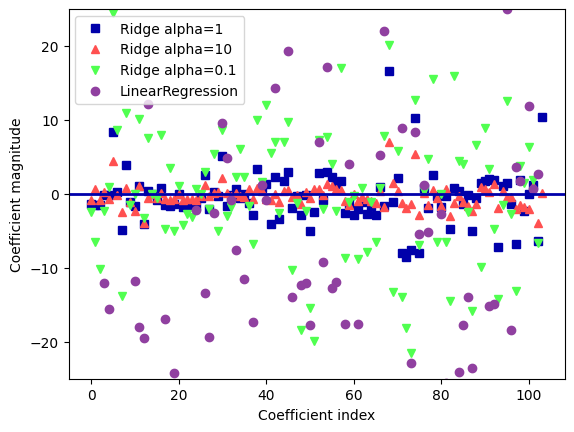

In [76]:
# 様々なalphaによるリッジ回帰と、線形回帰に対する係数の大きさの比較
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim() #現在のx軸の範囲を取得するための関数
plt.hlines(0, xlims[0], xlims[1]) #水平線を引くための関数
plt.xlim(xlims)
plt.ylim(-25, 25) #y軸は特徴量に対応する係数の数値（-25~25まで）
plt.legend()

/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternati

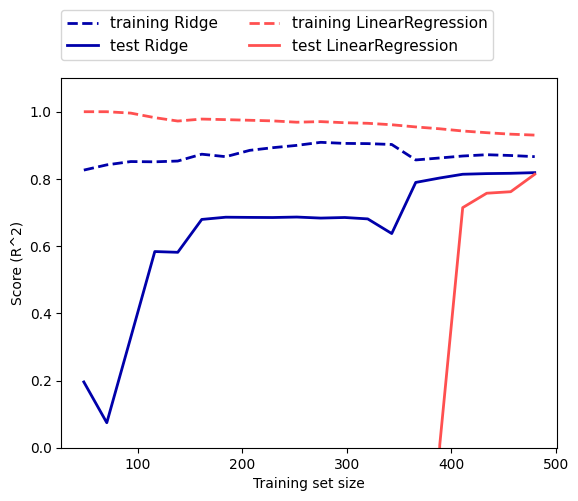

In [77]:
# alphaは1に固定
mglearn.plots.plot_ridge_n_samples()

テストスコアはリッジ回帰の方が良い＝十分な訓練データがない場合はリッジ回帰を使う方が良い。

特にデータサイズが小さいときは顕著で、400データポイント以下では、線形回帰は何も学習することができていない。

データが増えれば増えるほど双方のモデルとも性能は向上し、最後には線形回帰は追いつく　＝　十分な訓練データがあるのならばリッジ回帰と線形回帰は同じ性能を示す。

### 2.3.3.4 Lasso (Ridgeに変わる線形回帰：L1正則化)

Lassoにおいては、いくつかの係数が完全に0になり、いくつかの特徴量が完全に無視される

＝　モデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる

    ＝　特徴量が多く、そのうち重要なものはわずかしかないことが予想される場合・解釈しやすいモデルが欲しい場合に向く

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


適合不足であり、訓練セット・テストセットの両者に対して性能が悪い。

alpha=1.0の状態なので、alphaを減らして適合不足の度合いを減らす必要

In [39]:
# "max_iter"の値(最大の繰り返し回数)を増やす
# こうしておかないとモデルが、"max_iter"を増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [40]:
# alphaを小さくしすぎると正則化の効果が薄れ、過剰適合が発生する
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

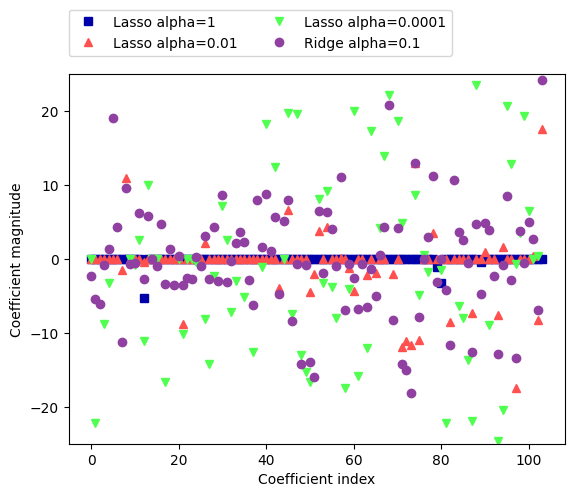

In [41]:
# alphaごとの結果をプロット
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### 2.3.3.5 クラス分類のための線形モデル

##### y = w[0] * x[0] + w[1] * x[1] + ・・・ + w[p] * x[p] + b > 0

→ 予測された値が0を超えるかどうかで分割している

/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


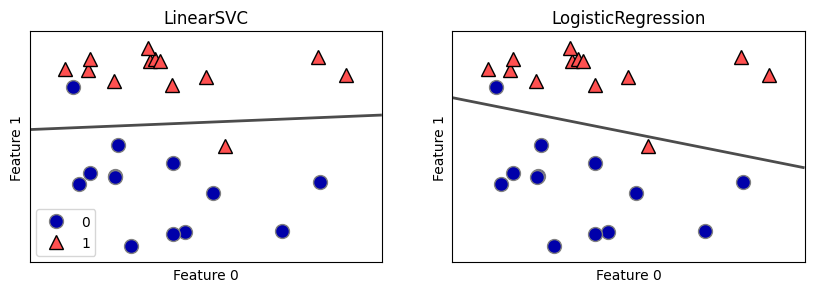

In [42]:
# LogisticRegressionモデルとLinearSVCモデルをforgeデータセットに適用して、決定境界を可視化する
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

# 学習された分類モデル(clf), 特徴量データ(X)、fillパラメータをFalseに設定して領域を塗りつぶさない
# epsパラメータを0.5に設定して境界線を滑らかにする
# axはMatplotlibのサブプロットオブジェクト、alphaは描画の透明度

LogisticRegressionとLinearSVCにおける正則化の強度を決定するトレードオフパラメータは「C」と呼ばれ、Cが大きくなると正則化(過剰適合を防ぐためにモデルの複雑さを制約する)は「弱く」なる。つまり、パラメータCを大きくすると、LogisticRegressionとLinearSVCは訓練データに対しての適合度を上げようとするが、パラメータCを小さくすると係数ベクトル(w)を0に近づけることを重視するようになる。

小さいCを用いると（強力な正規化）データポイントの「大多数」に対して適応しようとし、大きいCを用いると個々のデータポイントを正確にクラス分類しようとする（過剰適合しやすい）。

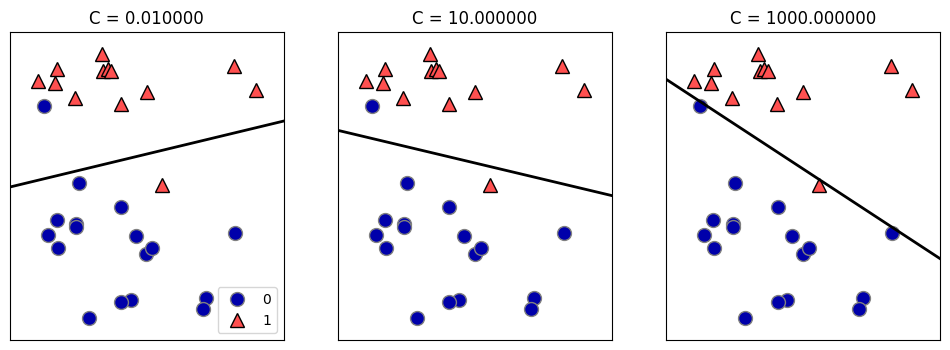

In [78]:
# LinearSVCの場合
mglearn.plots.plot_linear_svc_regularization()

In [80]:
# LogisticRegressionをcancerデータセットを用いて解析
# Cはデフォルトの1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#訓練セットとテストセットの精度がとても近いため、「適合不足」の可能性がある

Training set score: 0.948
Test set score: 0.958


/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# C=100の場合
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# C=0.01の場合
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


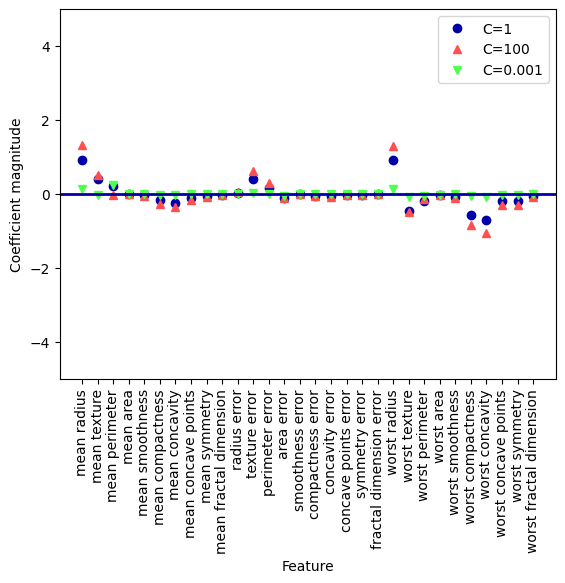

In [47]:
# 3つの正則化パラメータCに対して学習された係数を見る
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) #ラベル
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


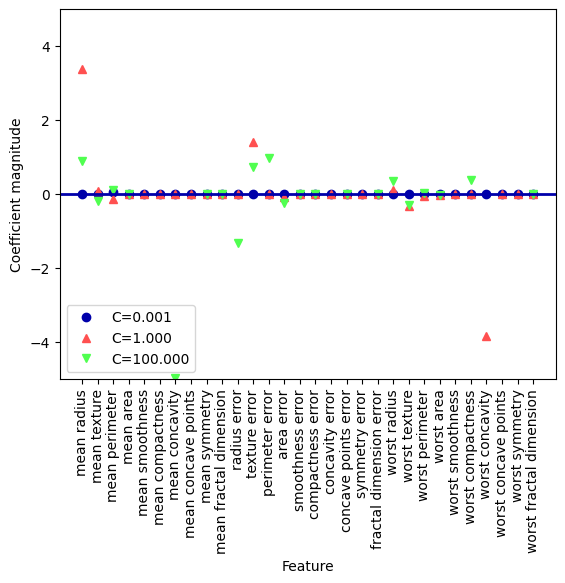

In [83]:
# 解釈しやすいL1正則化を使う（わずかな特徴量しか使わない）
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 2.3.3.6 線形モデルによる多クラス分類

多クラス分類アルゴリズムに拡張する一般的な手法は「1対その他」アプローチがある

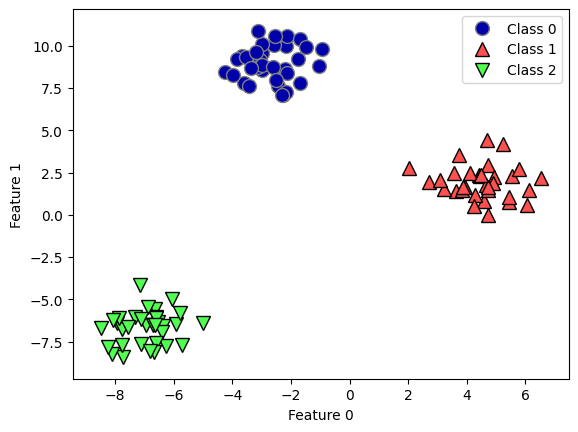

In [85]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
# 各データポイントは、X[:, 0]とX[:, 1]の2つの特徴量に基づいて位置決めされ、クラスラベルyによって色分けされる
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [86]:
# LinearSVÇクラス分類器を上記のデータセットで学習
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

# coef：係数配列の形状
# intercept：切片配列の形状

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


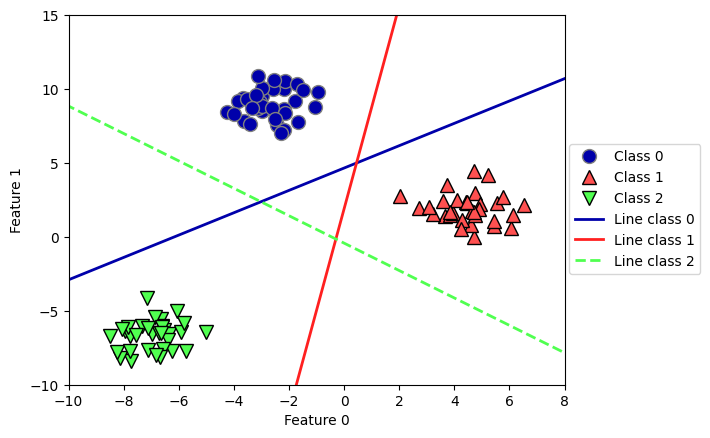

In [51]:
# 3つのクラス分類器による直線を可視化
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

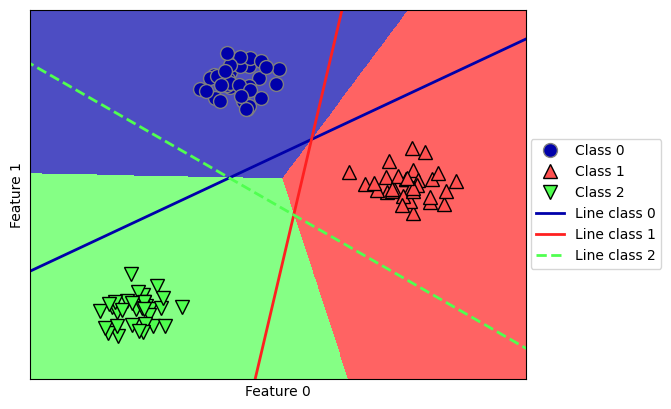

In [52]:
# 2次元空間全ての点に対する予測を描画
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 2.3.3.7 利点、欠点、パラメータ

    パラメータ：回帰モデルは「alpha」、LogisticRegressionとLinearSVCは「C」。alphaが大きい場合、Cが小さい場合は単純なモデルに対応する。一部の特徴量だけが重要な場合は「L1正則化」、デフォルトでは「L2正則化」を使う。

    利点：線形モデルの訓練・予測が非常に高速。大きなデータセットに適応可能。予測手法が理解しやすい。線形モデルは、特徴量の数がサンプルの個数よりも多い時に性能を発揮する。

    欠点：低次元空間では、他のモデルの方が汎化性能を示すことがある

### メソッドチェーン

複数のメソッド呼び出し（ここでは_initと_fit）を続けて書くことを「メソッドチェーン」という。
scikit-learnでは、fitとpredictに対してメソッドチェーンがよく使われる。

In [87]:
# 1行でモデルのインスタンスを生成して、訓練する
logreg = LogisticRegression().fit(X_train, y_train)

/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# モデルのインスタンスの生成と訓練と予測を1行で書ける
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/Users/rinamotoyama/Desktop/3年春学期/研究会/Python_MachineLearning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.3.4 ナイーブベイズクラス分類器

線形モデルよりもさらに高速（訓練・予測共に）。訓練の過程も理解しやすい。そのため、線形モデルですら、時間がかかりすぎるような大規模なデータセットに対するベースラインモデルとして非常に有効。ただし汎化性能がLogisticRegressionとLinearSVCよりもわずかに劣る。

高速である理由は、クラスに対する統計値を個々の特徴量ごとに集めてパラメータを学習するから。

scikit-learnには３種類のナイーブベイズクラス分類器、①GaussianNB（連続値データ適用）、②BernoulliNB（２値データ）、③MultinomialNB（カウントデータ）が実装されている。②・③はほとんどの場合、データのクラス分類に用いられる。

②・③にはパラメータが1つだけある。③の方が②よりも若干性能が良く、特に比較的多数の非ゼロ特徴量がある場合には③が有効。

In [56]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [57]:
counts = {}
for label in np.unique(y):
    # クラスに対してループ
    # それぞれの特徴量ごとに非ゼロの数を加算で数える
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
